### James Ong

The curse of dimensionality refers to the observation that certain machine learning models that depend on “nearby” observations (e.g. K-nearest neighbours) tend to do poorly as the number of features p increases. One way to demonstrate this is to start with some dataset, and then progressively add columns consisting of small amounts of random noise to get datasets with larger and larger p. For each p, find the optimal number of neighbours k, and record the corresponding optimal test score. Then observe how this optimal score changes with p. You can repeat this with other models (e.g. linear or logistic regression) and see how increasing p affects them. Finally, see if feature selection or regularization can reduce the detrimental effects of increasing p.

As the number of dimensions increases, the computational cost of finding the k-nearest neighbors of a data point grows exponentially. This is because the search space becomes larger and more complex, making it computationally intensive to calculate distances between data points.

### Run a KNN algorithm to evaluate the optimal test score as we increase the number of features.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss, accuracy_score

In [3]:
# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=2023)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [4]:
# Parameters
n_noise_features_max = 50  # max number of noise features to add
k_values = range(1, 11)  # possible k values to tune, reduced range


results = []

# Loop through different numbers of noise features
for p in range(0, n_noise_features_max + 1, 2):  # step of 2 to further reduce computation
    
    # Add p noise features
    X_train_noisy = np.hstack([X_train, np.random.randn(X_train.shape[0], p)])
    X_test_noisy = np.hstack([X_test, np.random.randn(X_test.shape[0], p)])
    
    # Grid search to find optimal k
    param_grid = {'n_neighbors': k_values}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train_noisy, y_train)
    
    # Compute test accuracy with optimal k
    optimal_k = grid_search.best_params_['n_neighbors']
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_optimal.fit(X_train_noisy, y_train)
    y_pred = knn_optimal.predict(X_test_noisy)
    acc = accuracy_score(y_test, y_pred)
    
    # Record results
    results.append((p, optimal_k, acc))

# Convert results to NumPy array for easier indexing
results = np.array(results)

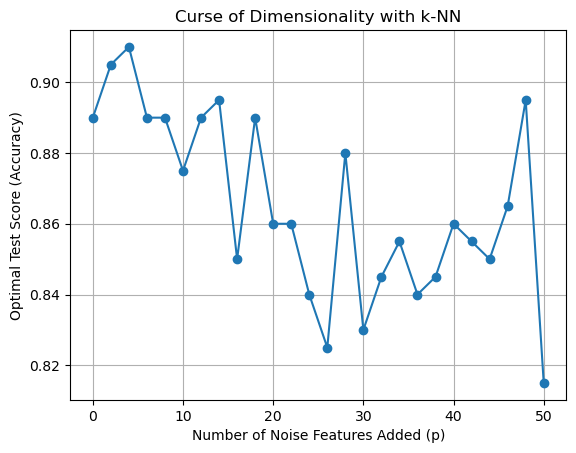

In [5]:
# Plotting the relationship between test score and number of features
plt.plot(results[:, 0], results[:, 2], marker='o')
plt.title('Curse of Dimensionality with k-NN')
plt.xlabel('Number of Noise Features Added (p)')
plt.ylabel('Optimal Test Score (Accuracy)')
plt.grid(True)
plt.show()


The graph illustrates how increasing the number of noise features would affect the optimal test score. In this case, it can be observed that there is an overall decrease of the optimal test score as features are added. This proves the concept of curse of dimensionality with k-NN as the model will perform poorly as number of features increase.

### Run a linear regression model to evaluate the MSE test score as we increase the number of features.

In [6]:
# Set seed for reproducibility
np.random.seed(0)

# 1. Create a dataset
n_samples = 100  # number of samples
n_features = 50  # total number of features

# Generate random data
X = np.random.randn(n_samples, n_features)

X

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.77749036,
        -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, ...,  1.78587049,
         0.12691209,  0.40198936],
       [ 1.8831507 , -1.34775906, -1.270485  , ...,  1.11701629,
        -1.31590741, -0.4615846 ],
       ...,
       [ 0.94853292,  1.23127609, -0.28818653, ...,  1.59242571,
        -0.04144268,  1.37594158],
       [ 1.35560413,  0.62532518,  1.67550176, ...,  0.52308533,
         1.73676704,  0.50865349],
       [ 1.16503885,  0.71312032,  1.3199769 , ...,  0.92918181,
         0.22941801,  0.41440588]])

In [12]:
# Generate target variable influenced by multiple features with varying weights
weights = np.array([1, 0.5, -0.5] + [0]*(n_features-3))  # only first three features are informative
y = X.dot(weights) + np.random.normal(scale=0.5, size=n_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Model Training, Evaluate and Record
train_mse = []
test_mse = []

# Train models with an increasing number of features
for i in range(1, n_features + 1):
    model = LinearRegression()
    model.fit(X_train[:, :i], y_train)
    
    # Predict and evaluate on the training set
    y_train_pred = model.predict(X_train[:, :i])
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    # Predict and evaluate on the testing set
    y_test_pred = model.predict(X_test[:, :i])
    test_mse.append(mean_squared_error(y_test, y_test_pred))

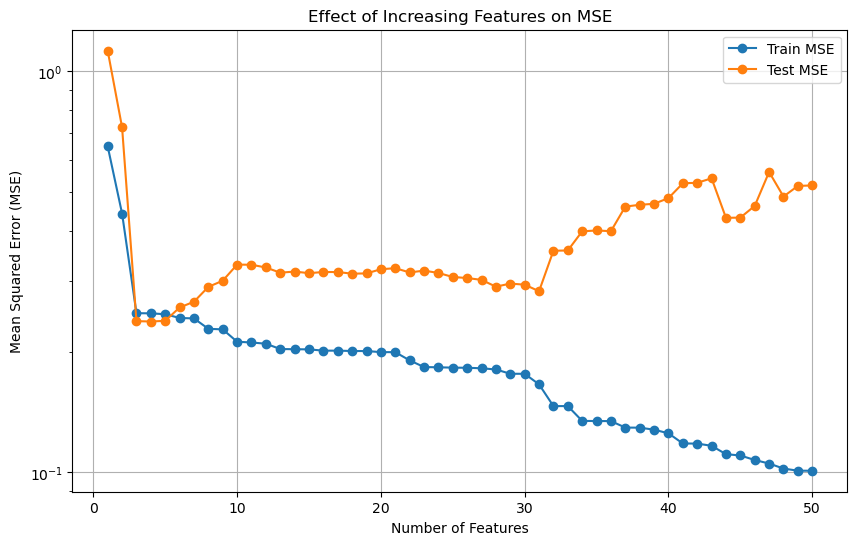

In [13]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features + 1), train_mse, label="Train MSE", marker='o')
plt.plot(range(1, n_features + 1), test_mse, label="Test MSE", marker='o')
plt.title("Effect of Increasing Features on MSE")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.yscale("log")  # log scale to observe changes more clearly
plt.show()

The graph illustrates how increasing the number of features would affect the MSE score for test and training. In this case, it can be observed that for training MSE, the line decreases continuously as more features are added, indicating that the model fits the training dataset well. The testing MSE demostrates a U-shaped characteristic. Initially, the testing MSE is high, suggesting underfitting. As we add more features, the testing MSE reaches a minimum point suggesting that the model generalises well. However, as the number of features increase, the testing MSE starts to increase as it starts to capture more noise, suggesting that the model starts to overfit.

### Run a logistic regression model to evaluate the MSE test score as we increase the number of features.

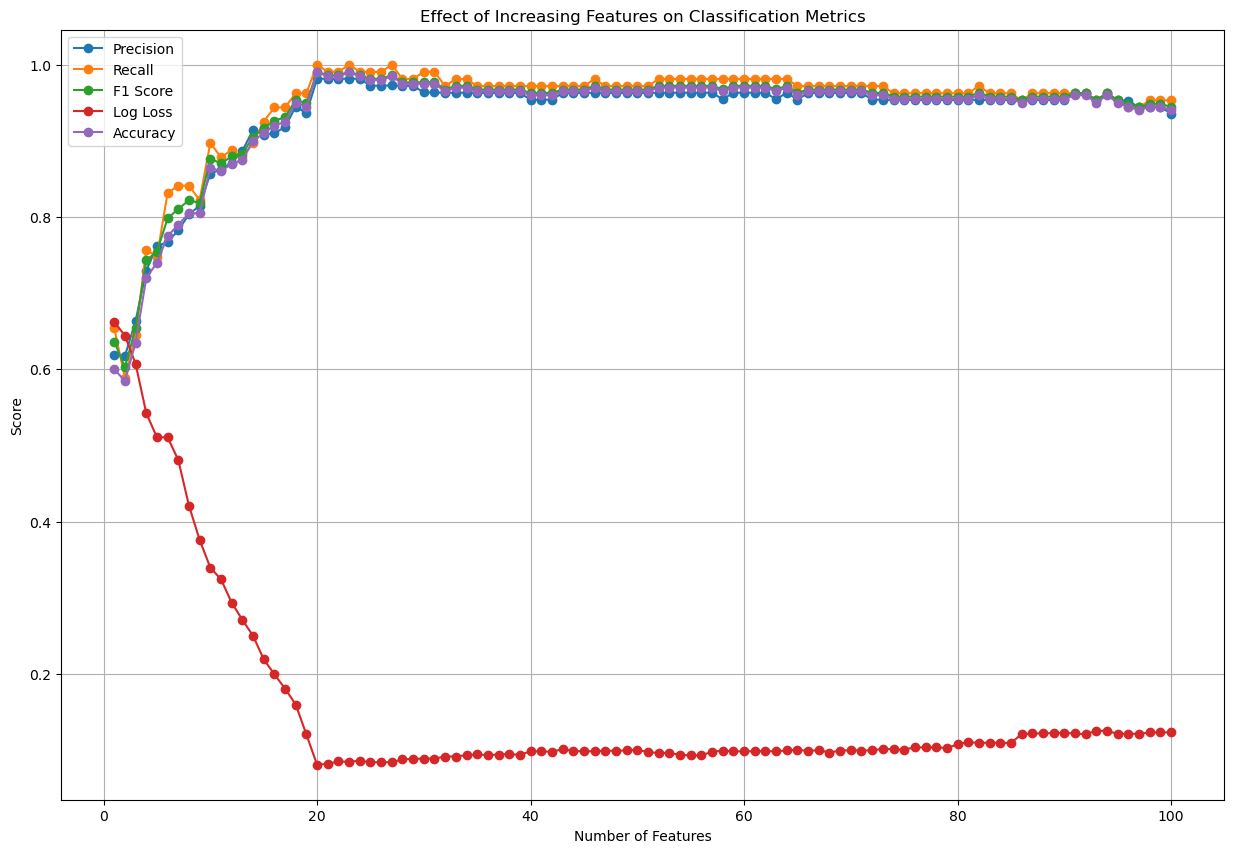

In [20]:
from sklearn.metrics import accuracy_score


np.random.seed(23)

n_samples = 1000  # samples
n_features = 100  # features

# Generate random data
X = np.random.randn(n_samples, n_features)

# Generate a binary target variable influenced by the first few and middle features
# First 10 features: Strong positive influence
# Next 10 features: Mild negative influence
# Last 80 features: No influence (noise)
weights = np.concatenate([np.ones(10), -0.5 * np.ones(10), np.zeros(80)])
y = X.dot(weights) + np.random.normal(scale=0.5, size=n_samples)
y = (y > 0).astype(int)  # Convert to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2. Model Training, 3. Evaluate and Record
metrics = {
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Log Loss": [],
    "Accuracy": []
}

# Train models with an increasing number of features
for i in range(1, n_features + 1):
    model = LogisticRegression(max_iter=1000, random_state=0)
    model.fit(X_train[:, :i], y_train)
    
    # Predict and evaluate on the testing set
    y_test_pred = model.predict(X_test[:, :i])
    y_test_prob = model.predict_proba(X_test[:, :i])[:, 1]
    
    # Record metrics
    metrics["Precision"].append(precision_score(y_test, y_test_pred))
    metrics["Recall"].append(recall_score(y_test, y_test_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_test_pred))
    metrics["Log Loss"].append(log_loss(y_test, y_test_prob))
    metrics["Accuracy"].append(accuracy_score(y_test, y_test_pred))

# 4. Plot
plt.figure(figsize=(15, 10))
for metric_name, metric_values in metrics.items():
    plt.plot(range(1, n_features + 1), metric_values, label=metric_name, marker='o')

plt.title("Effect of Increasing Features on Classification Metrics")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


As more features are added, the model becomes more complex. While this might improve performance up to a point, it also raises the risk of overfitting, where the model becomes too tailored to the training data and may perform poorly on new, unseen data.

Precision: Precision generally increases with the number of features, implying that the model becomes more reliable in its positive predictions as more features are included.

Recall: Recall also appears to increase overall as more features are utilized, suggesting that the model becomes better at identifying all the actual positive instances.

F1 Score: The F1 Score, which balances precision and recall, shows an upward trend, indicating that the harmonic mean of precision and recall improves as the model includes more features. This suggests a better overall performance in the classification task.

Log Loss: Log Loss seems to decrease with an increasing number of features, which is favorable since a lower Log Loss signifies better model performance, especially in terms of probability estimations for the classes.

Accuracy: Accuracy also tends to improve as more features are used, implying that the model makes more correct predictions (both true positives and true negatives) relative to the total number of observations.

### KNN algorithm with feature selection 

In [21]:
# Parameters
n_noise_features_max = 50  # max number of noise features to add
k_values = range(1, 11)  # possible k values to tune, reduced range
k_best_features = 15  # number of top features to select

# Store results
results_fs = []  # results after feature selection

# Loop through different numbers of noise features
for p in range(0, n_noise_features_max + 1, 2):  # step of 2 to further reduce computation
    
    # Add p noise features
    X_train_noisy = np.hstack([X_train, np.random.randn(X_train.shape[0], p)])
    X_test_noisy = np.hstack([X_test, np.random.randn(X_test.shape[0], p)])
    
    # Feature selection
    select_k_best = SelectKBest(score_func=f_classif, k=k_best_features)
    X_train_selected = select_k_best.fit_transform(X_train_noisy, y_train)
    X_test_selected = select_k_best.transform(X_test_noisy)
    
    # Grid search to find optimal k
    param_grid = {'n_neighbors': k_values}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train_selected, y_train)
    
    # Compute test accuracy with optimal k
    optimal_k = grid_search.best_params_['n_neighbors']
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_optimal.fit(X_train_selected, y_train)
    y_pred = knn_optimal.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    
    # Record results
    results_fs.append((p, optimal_k, acc))

# Convert results to NumPy array for easier indexing
results_fs = np.array(results_fs)

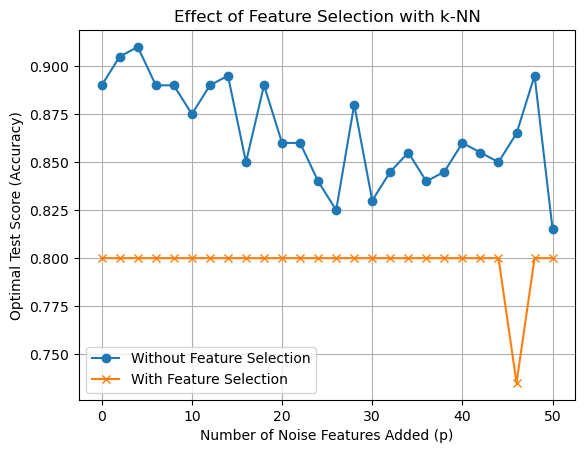

In [22]:
#Plotting
plt.plot(results[:, 0], results[:, 2], marker='o', label='Without Feature Selection')
plt.plot(results_fs[:, 0], results_fs[:, 2], marker='x', label='With Feature Selection')
plt.title('Effect of Feature Selection with k-NN')
plt.xlabel('Number of Noise Features Added (p)')
plt.ylabel('Optimal Test Score (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()


The graph illustrates how the optimal test score performs when number of noise features increases without and with feature selection. The line labeled "Without Feature Selection" exhibits a downward trend as more noisy features are added, which is a typical illustration of the curse of dimensionality where the performance of KNN degrades as the dimensionality (number of features) increase. The line labeled "With Feature Selection" should be more stable and maintain a higher accuracy across varying numbers of added noisy features. This is because, despite the addition of noisy features, the model still focuses on the top kk informative features during training and prediction, mitigating the detrimental effects of the added noisy features. However, there could be occurence where there is a dip on the 'With feature selection' line as the synthetic noisy features might contain patterns that accidentally correlates with the target variable and thus, misleading the feature selection process.

### Linear Regression with Ridge regularization

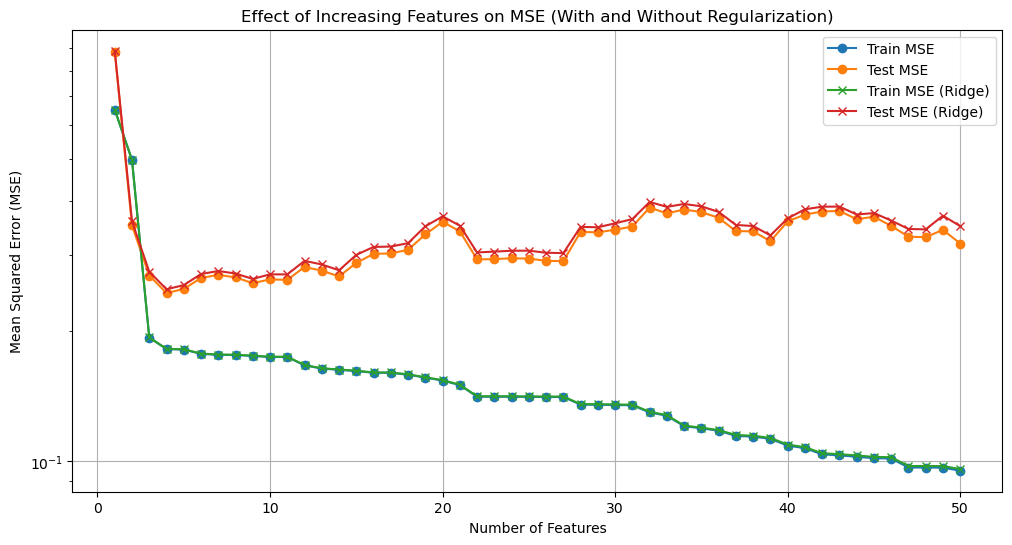

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(23)

# 1. Create a dataset
n_samples = 100  #no.of samples
n_features = 50  # total number of features

# Generate random data
X = np.random.randn(n_samples, n_features)
weights = np.array([1, 0.5, -0.5] + [0]*(n_features-3))  # only first three features are informative
y = X.dot(weights) + np.random.normal(scale=0.5, size=n_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training, Evaluate and Record
train_mse = []
test_mse = []
train_mse_ridge = []
test_mse_ridge = []

# Train models with an increasing number of features
for i in range(1, n_features + 1):
    # Without regularization
    model = LinearRegression()
    model.fit(X_train[:, :i], y_train)
    
    y_train_pred = model.predict(X_train[:, :i])
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = model.predict(X_test[:, :i])
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    # With regularization (Ridge regression)
    ridge_model = Ridge(alpha=1.0) 
    ridge_model.fit(X_train[:, :i], y_train)
    
    y_train_pred_ridge = ridge_model.predict(X_train[:, :i])
    train_mse_ridge.append(mean_squared_error(y_train, y_train_pred_ridge))
    
    y_test_pred_ridge = ridge_model.predict(X_test[:, :i])
    test_mse_ridge.append(mean_squared_error(y_test, y_test_pred_ridge))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_features + 1), train_mse, label="Train MSE", marker='o')
plt.plot(range(1, n_features + 1), test_mse, label="Test MSE", marker='o')
plt.plot(range(1, n_features + 1), train_mse_ridge, label="Train MSE (Ridge)", marker='x')
plt.plot(range(1, n_features + 1), test_mse_ridge, label="Test MSE (Ridge)", marker='x')
plt.title("Effect of Increasing Features on MSE (With and Without Regularization)")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.yscale("log")  # log scale to observe changes more clearly
plt.show()


In the plot, it can be observed that the impact of regularization, especially when the number of features increases, improves the performance of the model. Without regularization, as more features are added, the training MSE stays very low, but the testing MSE becomes quite erratic and generally increases, indicating that the model is overfitting the training data. With Ridge regularization, both the training and testing MSEs are more stable and typically higher, indicating a more conservative model that's possibly less prone to overfitting.

### Logistic regression model with elastic net regularization

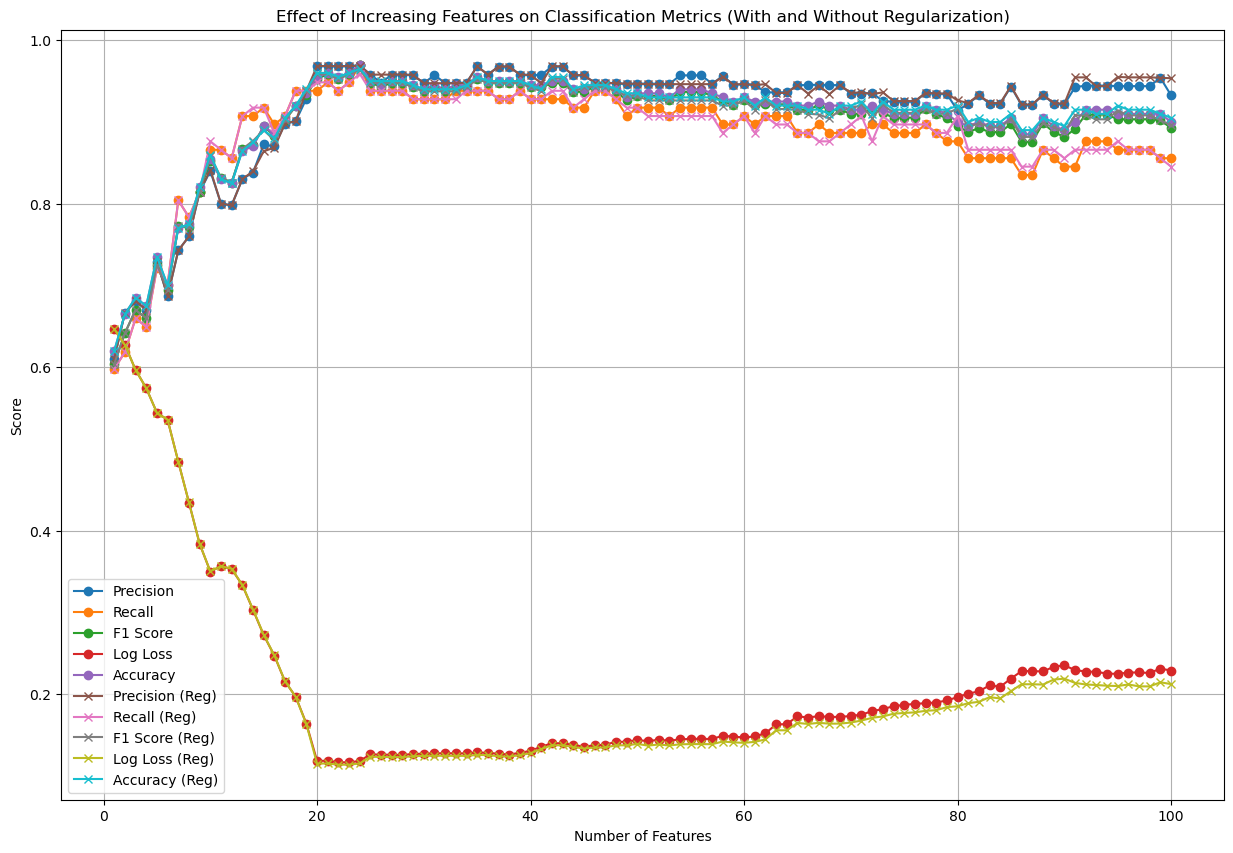

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

np.random.seed(23)

# Create a dataset
n_samples = 1000  # samples
n_features = 100  # features

# Generate random data
X = np.random.randn(n_samples, n_features)

# Generate a binary target variable
weights = np.concatenate([np.ones(10), -0.5 * np.ones(10), np.zeros(80)])
y = X.dot(weights) + np.random.normal(scale=0.5, size=n_samples)
y = (y > 0).astype(int)  # Convert to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


metrics = {"Precision": [], "Recall": [], "F1 Score": [], "Log Loss": [], "Accuracy": []}
metrics_reg = {"Precision": [], "Recall": [], "F1 Score": [], "Log Loss": [], "Accuracy": []}

# Train models with an increasing number of features
for i in range(1, n_features + 1):
    # Without regularization
    model = LogisticRegression(max_iter=1000, random_state=0)
    model.fit(X_train[:, :i], y_train)
    y_test_pred = model.predict(X_test[:, :i])
    y_test_prob = model.predict_proba(X_test[:, :i])[:, 1]
    
    #Metrics
    metrics["Precision"].append(precision_score(y_test, y_test_pred))
    metrics["Recall"].append(recall_score(y_test, y_test_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_test_pred))
    metrics["Log Loss"].append(log_loss(y_test, y_test_prob))
    metrics["Accuracy"].append(accuracy_score(y_test, y_test_pred))
    
    # With Elastic Net regularization
    model_reg = LogisticRegression(max_iter=1000, random_state=0, penalty='elasticnet', solver='saga', l1_ratio=0.5)
    model_reg.fit(X_train[:, :i], y_train)
    y_test_pred_reg = model_reg.predict(X_test[:, :i])
    y_test_prob_reg = model_reg.predict_proba(X_test[:, :i])[:, 1]
    
    # Record metrics
    metrics_reg["Precision"].append(precision_score(y_test, y_test_pred_reg))
    metrics_reg["Recall"].append(recall_score(y_test, y_test_pred_reg))
    metrics_reg["F1 Score"].append(f1_score(y_test, y_test_pred_reg))
    metrics_reg["Log Loss"].append(log_loss(y_test, y_test_prob_reg))
    metrics_reg["Accuracy"].append(accuracy_score(y_test, y_test_pred_reg))

# Plot
plt.figure(figsize=(15, 10))
markers = ['o', 'x']
for metric_name, metric_values in metrics.items():
    plt.plot(range(1, n_features + 1), metric_values, label=metric_name, marker=markers[0])

for metric_name, metric_values in metrics_reg.items():
    plt.plot(range(1, n_features + 1), metric_values, label=metric_name + ' (Reg)', marker=markers[1])

plt.title("Effect of Increasing Features on Classification Metrics (With and Without Regularization)")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


Overall, it seems that:
    
Without Regularization: Metrics from the model trained without regularization might show more fluctuation and potentially lower performance on the test set, especially as more (possibly noisy) features are added.

With Regularization: Metrics from the model trained with Elastic Net regularization typically demonstrate more stability and resistance to overfitting as feature quantity increases.

Therefore, Elastic net regularization does improve the model but it is also good to consider feature selection if it is not computational heavy. 